<a href="https://colab.research.google.com/github/kaustubholpadkar/MyTorch/blob/modules%2Ftensors_autodiff/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [0]:
import torch
import matplotlib.pyplot as plt

### Plotting Function

In [0]:
def plot(data, y_label="", x_label=""):
    plt.plot(data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### Generate Dummy Data Function

In [0]:
def gen_data(N, W, B, N_FEATURES):
    
    X = torch.rand(N, N_FEATURES)
    y = torch.mm(X, W) + B
    
    return X, y

### Linear Regression

In [0]:
class LinearRegression:
    
    
    def __init__(self):
        
        self.W = None
        self.b = None
        

        
    def fit(self, X, y, learning_rate, max_iterations):
        
        n_features = X.size()[1]
        
        self.W = torch.zeros(n_features, 1, requires_grad=True)
        self.b = torch.tensor(0.0, requires_grad=True)
        
        learning_rate = torch.tensor(learning_rate)
        
        losses = []
        
        for i in range(max_iterations):
            
            dW, db = self.gradients(X, y)
            
            with torch.no_grad():
                
                self.W -= learning_rate * dW
                self.b -= learning_rate * db
            
                self.reset_gradients()
            
                loss = self.loss(X, y).item()
                losses.append(loss)
            
        return losses
    
    
    def predict(self, X):
        
        y_pred = torch.mm(X, self.W) + self.b
        
        return y_pred
    
    
    def gradients(self, X, y):
        
        loss = self.loss(X, y)
        loss.backward()
        
        dW = self.W.grad
        db = self.b.grad
        
        return dW, db
    
    
    def reset_gradients(self):
        
        self.W.grad.zero_()
        self.b.grad.zero_()
    
    
    def loss(self, X, y):
        
        y_pred = self.predict(X)
        
        diff = y - y_pred
        
        loss = torch.sum(diff * diff) / diff.numel()
        
        return loss

### Original Parameters

In [0]:
N_FEATURES = 5

In [0]:
W = torch.rand(N_FEATURES, 1)
B = 6.7

### Hyperparameters

In [0]:
learning_rate = 0.03
max_iterations = 100

### Other Parameters

In [0]:
N = 100

### Generate Dummy Data

In [0]:
X, y = gen_data(N, W, B, N_FEATURES)

### Create Model

In [0]:
model = LinearRegression()

In [0]:
losses = model.fit(X, y, learning_rate, max_iterations)

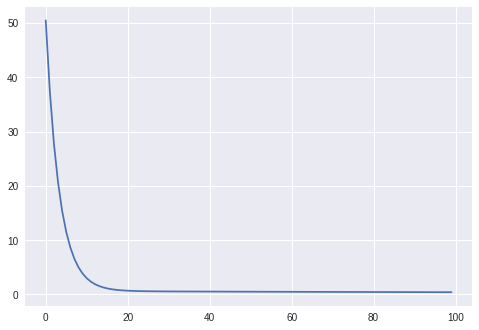

In [37]:
plot(losses)